## 1. Installation (Python 3.9.13)

In [1]:
!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 numpy==1.26.4 matplotlib==3.9.0 keras==2.8.0 opencv-python==4.9.0.80 scikit-learn==1.5.0 pandas==2.2.2

  Using cached tensorflow-2.8.0-cp39-cp39-win_amd64.whl.metadata (2.9 kB)
  Using cached tensorflow_gpu-2.8.0-cp39-cp39-win_amd64.whl.metadata (2.9 kB)
  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl.metadata (61 kB)
  Using cached matplotlib-3.9.0-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached keras-3.3.3-py3-none-any.whl.metadata (5.7 kB)
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached scikit_learn-1.5.0-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached pandas-2.2.2-cp39-cp39-win_amd64.whl.metadata (19 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp39-cp39-win_amd64.whl.metadata (2.5 kB)
  Using

In [2]:
!pip install protobuf==3.20

  Using cached protobuf-3.20.0-cp39-cp39-win_amd64.whl.metadata (699 bytes)
Using cached protobuf-3.20.0-cp39-cp39-win_amd64.whl (904 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.27.0
    Uninstalling protobuf-5.27.0:
      Successfully uninstalled protobuf-5.27.0


In [3]:
!pip list

Package                      Version
---------------------------- -------------------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.3
certifi                      2024.2.2
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
exceptiongroup               1.2.1
executing                    2.0.1
filelock                     3.13.1
flatbuffers                  24.3.25
fonttools                    4.52.4
fsspec                       2024.2.0
gast                         0.5.4
google-auth                  2.29.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.64.0
h5py                         3.11.0
idna                         3.7
importlib_metadata         

### 1.1 Limit Memory Growth

In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices("GPU")

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 2. Augmentation

### 2.1 Albumentations Installation

In [ ]:
# !pip install albumentations

In [ ]:
# !pip install torch

### 2.2 Setup Albumentations Transform

In [ ]:
# import albumentations as alb
# from albumentations.pytorch import ToTensorV2

In [ ]:
# augmentor = alb.Compose(
#     [
#         alb.Resize(width=128, height=128),
#         alb.HorizontalFlip(p=0.5),
#         alb.RandomBrightnessContrast(p=0.2),
#         alb.RandomGamma(p=0.2),
#         alb.RGBShift(p=0.2),
#         alb.VerticalFlip(p=0.5),
#     ],
# )

### 2.3 Run Augmentation

In [ ]:
# # Function to process a single image and its XML annotation
# def process_image(image_path):
#     # Load the image
#     image = cv2.imread(image_path)

#     for x in range(10):
#         # Apply the augmentation
#         augmented = augmentor(image=image)

#         augmented_image = augmented["image"]

#         # Save the augmented image and create a new XML file with the updated bounding boxes
#         augmented_image_path = image_path.replace("images", "augmented_images")
#         augmented_image_path = augmented_image_path.replace(".jpg", f"{x}.jpg")

#         os.makedirs(os.path.dirname(augmented_image_path), exist_ok=True)

#         cv2.imwrite(augmented_image_path, augmented_image)

In [ ]:
# base_dir = "../Garbage/images"
# for root, dirs, files in os.walk(base_dir):
#     for file in files:
#         if file.endswith(".jpg"):
#             image_path = os.path.join(root, file)
#             process_image(image_path)

## 3. Beginning of the Project

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization

### 3.1 Setup Parameters

In [5]:
path = "augmented_images_cctv"
label_file = "labels_cctv.csv"
batch_size_val = 32  # Number of images to process together during training.
steps_per_epoch_val = 2000  # Baris ini mendefinisikan variabel steps_per_epoch_val yang menentukan jumlah iterasi pelatihan per epoch. Nilai 2000 berarti model akan dilatih selama 2000 iterasi setiap epoch.
epochs_val = 100
image_dimensions = (72, 128, 3) # Dimensions of the input images (height, width, channels).
test_ratio = 0.2  # If 1000 images split will 200 for testing (Baris ini mendefinisikan variabel testRatio yang menentukan proporsi data yang akan digunakan sebagai set tes. Nilai 0.2 berarti 20% dari data akan digunakan sebagai set tes, dan 80% sisanya akan digunakan sebagai set training dan validation).
validation_ratio = 0.1  # If 1000 images 20% of remaining 800 will be 160 for validation.

### 3.2 Reads Images from Class Directories

In [6]:
count = 0
images = []
class_no = []
my_list = os.listdir(path)
print("Total Classes Detected:", len(my_list))
no_of_classes = len(my_list)
print("Importing Classes.....")
for x in range(0, len(my_list)):
    my_pic_list = os.listdir(path + "/" + str(count))  # Get list of images in current class directory.

    # Loop through each image in the class directory.
    for y in my_pic_list:
        cur_img = cv2.imread(path + "/" + str(count) + "/" + y)  # Read the image.
        images.append(cur_img)  # Append the image to the images list.
        class_no.append(count)  # Append the class number to the class_no list.
    print(count, end=" ")
    count += 1
print(" ")
images = np.array(images)  # Convert images list to numpy array.
class_no = np.array(class_no)  # Convert class_no list to numpy array.

Total Classes Detected: 2
Importing Classes.....
0 1  


### 3.3 Split Images into Train, Val, and Test

In [7]:
# Split the dataset into training and testing sets, with the specified test ratio.
X_train, X_test, y_train, y_test = train_test_split(
    images, class_no, test_size=test_ratio
)

# Further split the training set into training and validation sets, with the specified validation ratio.
X_train, X_validation, y_train, y_validation = train_test_split(
    X_train, y_train, test_size=validation_ratio
)

# Calculate the number of steps per epoch for training and validation datasets, based on the batch size.
steps_per_epoch_val = len(X_train) // batch_size_val
validation_steps = len(X_test) // batch_size_val

# X_train = Array of images to train.
# y_train = Corresponding class id.

### 3.4 Prints the Shapes of the Datasets to Ensure Consistency in the Number of Images and Labels

In [8]:
# Print the shapes of the datasets to check if the number of images matches the number of labels for each dataset.
print("Data Shapes")
print("Train", end="")
print(X_train.shape, y_train.shape)
print("Validation", end="")
print(X_validation.shape, y_validation.shape)
print("Test", end="")
print(X_test.shape, y_test.shape)

# Assert statements to ensure consistency in the number of images and labels across datasets and that image dimensions are correct.
assert (
    X_train.shape[0] == y_train.shape[0]
), "The number of images is not equal to the number of labels in training set"
assert (
    X_validation.shape[0] == y_validation.shape[0]
), "The number of images is not equal to the number of labels in validation set"
assert (
    X_test.shape[0] == y_test.shape[0]
), "The number of images is not equal to the number of labels in test set"
assert X_train.shape[1:] == (
    image_dimensions
), " The dimensions of the training images are wrong"
assert X_validation.shape[1:] == (
    image_dimensions
), " The dimensions of the validation images are wrong"
assert X_test.shape[1:] == (
    image_dimensions
), " The dimensions of the test images are wrong"

Data Shapes
Train(1688, 72, 128, 3) (1688,)
Validation(188, 72, 128, 3) (188,)
Test(469, 72, 128, 3) (469,)


### 3.5 Read CSV File (Labels)

In [9]:
data = pd.read_csv(label_file)

### 3.6 Display Images of All the Classes

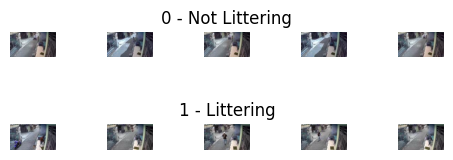

In [10]:
num_of_samples = []
cols = 5
num_classes = no_of_classes
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 2))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(
            x_selected[random.randint(0, len(x_selected) - 1), :, :],
            cmap=plt.get_cmap("gray"),
        )
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + " - " + row["Name"])
            num_of_samples.append(len(x_selected))

### 3.7 Distribution of the Dataset

[567, 1778]


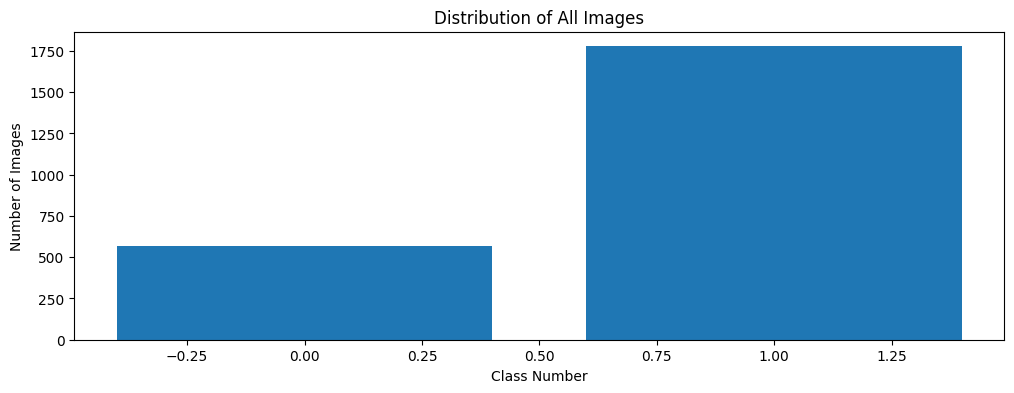

In [11]:
# Calculate the number of samples for each class using the class labels.
num_of_samples_all = [np.sum(class_no == i) for i in range(no_of_classes)]

# Display the distribution of all images.
print(num_of_samples_all)
plt.figure(figsize=(12, 4))
plt.bar(range(0, no_of_classes), num_of_samples_all)
plt.title("Distribution of All Images")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")
plt.show()

### 3.8 Distribution of the Training Dataset

[405, 1283]


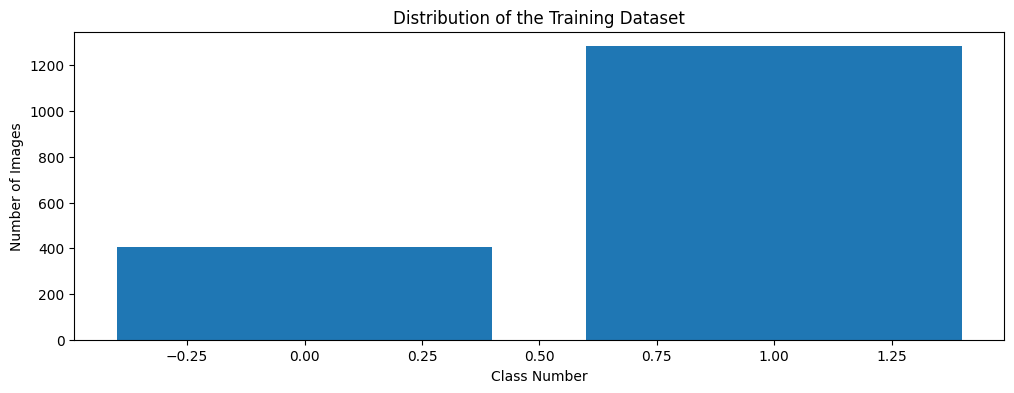

In [12]:
print(num_of_samples)
sum(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the Training Dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")
plt.show()

### 3.9 Preprocessing the Images

In [13]:
# # Convert the image to grayscale.
# def grayscale(img):
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     return img


# # Apply histogram equalization to standardize the lighting in the image.
# def equalize(img):
#     img = cv2.equalizeHist(img)
#     return img


def preprocessing(img):
#     img = grayscale(img)  
#     img = equalize(img)  
    img = img / 255  # Menormalisasi nilai piksel menjadi rentang 0 hingga 1.
    return img

# Menerapkan fungsi preprocessing ke setiap gambar dalam set pelatihan, validasi, dan tes
X_train = np.array(
    list(map(preprocessing, X_train))
)  
X_validation = np.array(list(map(preprocessing, X_validation)))
X_test = np.array(list(map(preprocessing, X_test)))

In [14]:
y_train = to_categorical(y_train, no_of_classes)
y_validation = to_categorical(y_validation, no_of_classes)
y_test = to_categorical(y_test, no_of_classes)

In [66]:
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
# X_validation = X_validation.reshape(
#     X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1
# )
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

### 3.10 CNN Model

In [15]:
# def myModel():
#     no_of_filters = 60
#     size_of_filter = (5, 5)  # The kernel size used for convolutional layers, which moves around the image to extract features.
#     size_of_filter2 = (3, 3)  # Another kernel size used for convolutional layers.
#     size_of_pool = (2, 2)  # The size of the pooling operation.
#     no_of_nodes = 500  # Number of nodes in the hidden layers of the neural network.

#     model = Sequential()
#     # Menambahkan lapisan konvolusi dengan aktivasi relu dan ukuran filter pertama.
#     model.add(
#         (
#             Conv2D(
#                 no_of_filters,
#                 size_of_filter,
#                 input_shape=(image_dimensions[0], image_dimensions[1], 1),
#                 activation="relu",
#             )
#         )
#     )
#     # Menambahkan lapisan konvolusi kedua dengan ukuran filter yang sama.
#     model.add((Conv2D(no_of_filters, size_of_filter, activation="relu")))
#     # Add a max pooling layer to downscale the feature maps.
#     model.add(MaxPooling2D(pool_size=size_of_pool))

#     # Menambahkan lapisan konvolusi ketiga dengan setengah jumlah filter.
#     model.add((Conv2D(no_of_filters // 2, size_of_filter2, activation="relu")))
#     # Menambahkan lapisan konvolusi keempat dengan setengah jumlah filter.
#     model.add((Conv2D(no_of_filters // 2, size_of_filter2, activation="relu")))
#     # Menambahkan lapisan pooling kedua.
#     model.add(MaxPooling2D(pool_size=size_of_pool))
#     # Menambahkan lapisan dropout untuk mengurangi overfitting.
#     model.add(Dropout(0.5))

#     # Flatten the output of the convolutional layers (menjadi vektor satu dimensi).
#     model.add(Flatten())
#     # Menambahkan dense hidden layer with ReLU activation dengan jumlah node yang ditentukan.
#     model.add(Dense(no_of_nodes, activation="relu"))
#     # Menambahkan lapisan dropout kedua.
#     model.add(Dropout(0.5))
#     # Menambahkan lapisan output akhir dengan jumlah node yang sama dengan jumlah kelas dan aktivasi softmax untuk klasifikasi multiclass.
#     model.add(Dense(no_of_classes, activation="softmax"))

#     # Compile the model with Adam optimizer, categorical crossentropy loss (untuk klasifikasi multiclass), and accuracy metric.
#     #
#     model.compile(
#         Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"]
#     )

#     return model

In [15]:
def myModel():
    no_of_filters = 64
    size_of_filter = (3, 3)
    size_of_filter2 = (3, 3)
    size_of_pool = (2, 2)
    no_of_nodes = 512

    model = Sequential()
    # Convolutional Layer 1
    model.add(
        Conv2D(
            no_of_filters,
            size_of_filter,
            input_shape=(image_dimensions[0], image_dimensions[1], 3),
            activation="relu",
        )
    )
    model.add(BatchNormalization())

    # Convolutional Layer 2
    model.add(Conv2D(no_of_filters, size_of_filter, activation="relu"))
    model.add(BatchNormalization())

    # MaxPooling dan Dropout untuk Layer Convolutional 1 dan 2
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.3))

    # Convolutional Layer 3
    model.add(Conv2D(no_of_filters // 2, size_of_filter2, activation="relu"))
    model.add(BatchNormalization())

    # Convolutional Layer 4
    model.add(Conv2D(no_of_filters // 2, size_of_filter2, activation="relu"))
    model.add(BatchNormalization())

    # MaxPooling dan Dropout untuk Layer Convolutional 3 dan 4
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.3))

    # Flatten Layer
    model.add(Flatten())

    # Dense Layer
    model.add(Dense(no_of_nodes, activation="relu"))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(no_of_classes, activation="softmax"))

    model.compile(
        Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [16]:
# Callback untuk menyimpan model dengan validasi terbaik selama pelatihan.
checkpoint = ModelCheckpoint(
    "people_garbage_without_preprocessing_model.h5",
    verbose=1,  # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
    save_best_only=True,  # Indicates that only the model with the best validation loss will be saved.
)

# Callback untuk menghentikan pelatihan lebih awal jika tidak ada peningkatan.
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10,  # Defines the number of epochs to wait without improvement before stopping training.
    restore_best_weights=True,  # Indicates that the model weights from the last epoch with the best validation loss should be loaded before resuming training if the training is restarted.
)

# Callback to reduce the learning rate if there is no improvement.
reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=5,  # Defines the number of epochs to wait without improvement before reducing the learning rate.
    min_lr=0.00001,  # Batas bawah laju pembelajaran.
)

In [17]:
model = myModel()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 70, 126, 64)       1792      
                                                                 
 batch_normalization (BatchN  (None, 70, 126, 64)      256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 68, 124, 64)       36928     
                                                                 
 batch_normalization_1 (Batc  (None, 68, 124, 64)      256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 62, 64)       0         
 )                                                               
                                                        

In [18]:
!nvidia-smi

Thu Dec  5 13:53:11 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.14                 Driver Version: 566.14         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   46C    P0             14W /   85W |     212MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [19]:
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size_val,
    steps_per_epoch=steps_per_epoch_val,
    epochs=epochs_val,
    callbacks=[checkpoint, early_stopping, reduce_lr],
    validation_data=(X_validation, y_validation),
    shuffle=True,
)

Epoch 1/100
51/52 [============================>.] - ETA: 0s - loss: 0.5507 - accuracy: 0.9694
Epoch 1: val_loss improved from inf to 0.38537, saving model to people_garbage_without_preprocessing_model.h5
52/52 [==============================] - 5s 60ms/step - loss: 0.5401 - accuracy: 0.9700 - val_loss: 0.3854 - val_accuracy: 0.9628 - lr: 0.0010
Epoch 2/100
51/52 [============================>.] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2: val_loss did not improve from 0.38537
52/52 [==============================] - 3s 41ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.5921 - val_accuracy: 0.6809 - lr: 0.0010
Epoch 3/100
51/52 [============================>.] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3: val_loss did not improve from 0.38537
52/52 [==============================] - 2s 40ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.5015 - val_accuracy: 0.2606 - lr: 0.0010
Epoch 4/100
51/52 [============================>.] - ETA: 0s - los

### 3.11 Evaluating the Model

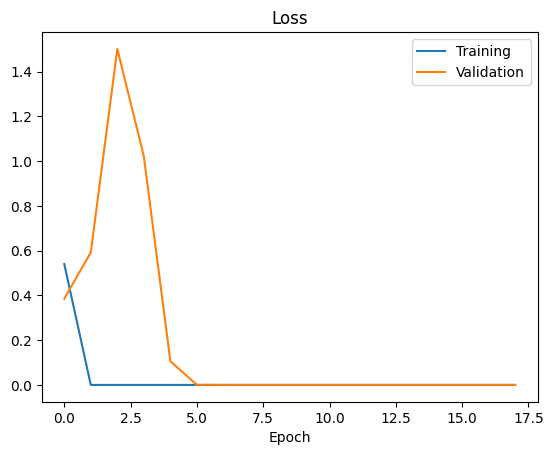

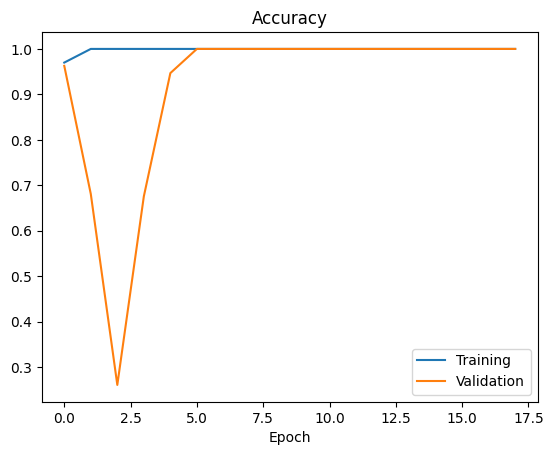

Test Score: 2.541775678821523e-10
Test Accuracy: 1.0


In [20]:
plt.figure(1)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Training", "Validation"])
plt.title("Loss")
plt.xlabel("Epoch")

plt.figure(2)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Training", "Validation"])
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.show()

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Confusion Matrix

In [20]:
!pip install seaborn==0.13.2

In [21]:
!pip list

Package                      Version
---------------------------- -------------------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.3
certifi                      2024.2.2
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
exceptiongroup               1.2.1
executing                    2.0.1
filelock                     3.13.1
flatbuffers                  24.3.25
fonttools                    4.52.4
fsspec                       2024.2.0
gast                         0.5.4
google-auth                  2.29.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.64.0
h5py                         3.11.0
idna                         3.7
importlib_metadata         

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

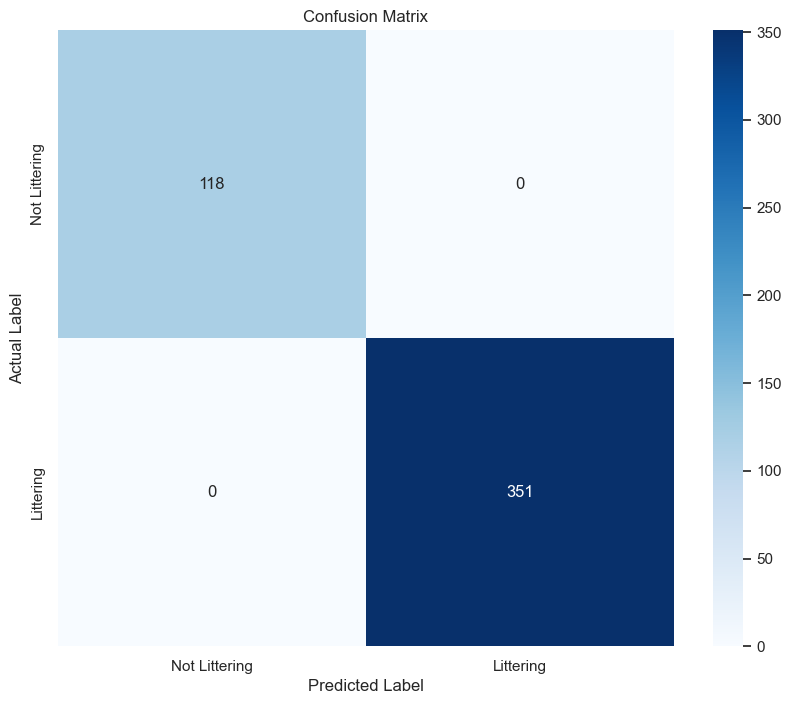

In [22]:
# Predict on Test Set
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)


# Confusion Matrix
mat = confusion_matrix(y_test_true_classes, y_test_pred_classes)


# Class labels
def getClassName(class_no):
    classes = [
        "Not Littering",
        "Littering",
    ]
    return classes[class_no] if 0 <= class_no < len(classes) else "Unknown"


class_labels = [getClassName(i) for i in range(no_of_classes)]

sns.set()
plt.figure(figsize=(10, 8))
sns.heatmap(
    mat,
    square=True,
    annot=True,
    fmt="d",
    cbar=True,
    cmap="Blues",
    xticklabels=class_labels,
    yticklabels=class_labels,
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Classification Report

In [23]:
# Classification Report
report = classification_report(
    y_test_true_classes, y_test_pred_classes, target_names=class_labels
)
print(report)

               precision    recall  f1-score   support

Not Littering       1.00      1.00      1.00       118
    Littering       1.00      1.00      1.00       351

     accuracy                           1.00       469
    macro avg       1.00      1.00      1.00       469
 weighted avg       1.00      1.00      1.00       469



Display Images with Predictions

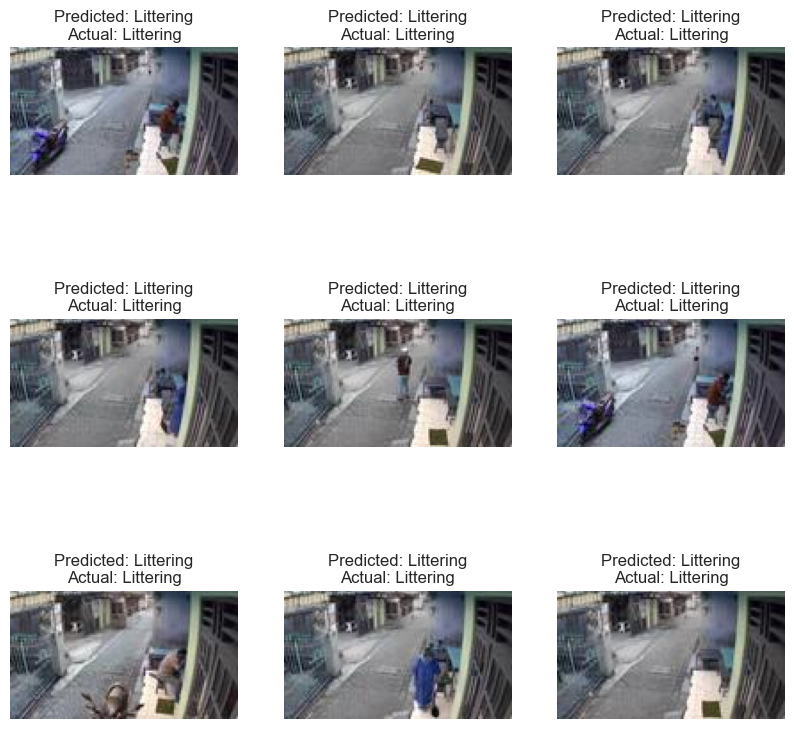

In [24]:
# Display Images with Predictions
plt.figure(figsize=(10, 10))
indices = np.random.choice(len(X_test), 9, replace=False)
for i, index in enumerate(indices):
    ax = plt.subplot(3, 3, i + 1)
    img = (
        X_test[index].reshape(
            image_dimensions[0], image_dimensions[1], image_dimensions[2]
        )
        * 255.0
    )
    plt.imshow(img.astype("uint8"))
    plt.title(
        f"Predicted: {class_labels[y_test_pred_classes[index]]}\nActual: {class_labels[y_test_true_classes[index]]}"
    )
    plt.axis("off")
plt.show()

Prediction Function

In [25]:
def predict(path):
    imageShow = tf.keras.preprocessing.image.load_img(path, target_size=(500, 500))
    image = tf.keras.preprocessing.image.load_img(path, target_size=(72, 128))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = tf.expand_dims(image_array, axis=0)  # Create batch axis
    image_array /= 255.0

    predictions = model.predict(image_array)
    for i, label in enumerate(class_labels):
        print(f"{label}: {predictions[0][i]}")
    score = predictions[0]
    predicted_class = np.argmax(score)
    prediction = class_labels[predicted_class]

    plt.imshow(imageShow)
    plt.title(prediction)
    plt.axis("off")
    plt.show()

Not Littering: 1.0
Littering: 3.910330175979637e-13


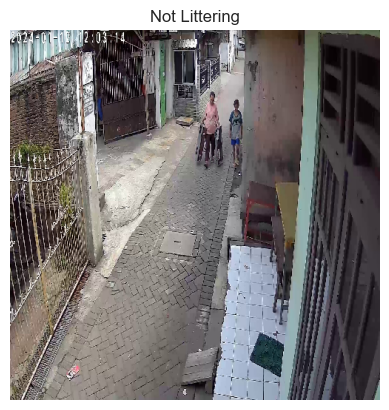

Not Littering: 5.766026978798466e-12
Littering: 1.0


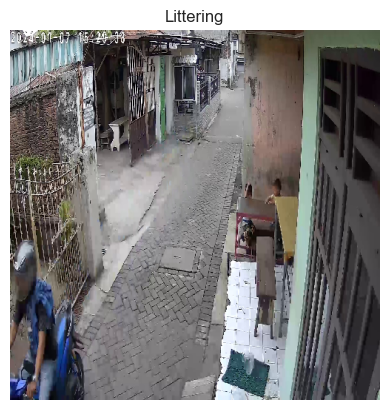

In [26]:
predict("images_cctv/0/20231107_175024_tp00216 0_80.jpg")
predict("images_cctv/1/20240107_151039_tp00036 3_1194.jpg")